In [58]:
import pandas as pd

from Driver.driver import compute_alpha_with_markov_strat_for_ticker, retrieve_and_add_markov, compute_alpha_with_markov_strat_for_list_tickers, retrieve_data_and_add_features, assign_states_and_calculate_transition_probabilities
from Scrapers.yf_scraper import YFScraper
from Markov_State_Determiners.Czech_State_Determiner import CzechStateDeterminer
from Transition_Probability_Calculation.Empirical_Calculator import EmpiricalCalculator
from Transition_Probability_Calculation.Contour_Empirical_Calculator import ContourEmpiricalCalculator
from Basic_Feature_Selection.feature_addition import add_basic_technical_analysis_vars
from Markov_Strategies.Czech_State_Determiner.Czech_Strategy1 import CzechStrategy1
"""
REPORT INDICES:
Avg Alpha
Adj Alpha
M_P
BH_P
Ind Removed
Avg. Markov_R/MU_T
Percentile (Against Random)
Avg. BuyHold_R/MU_T
M/BH DTs
markov_dts
buy_hold_dts
Random Mean
Random Standard Deviation
macro_t_units


For the analytics, the indices are listed as follows:
State Combo
Avg Return %
Profitable %
Over B %
STD
Num Instances
Returns
"""

'\nREPORT INDICES:\nAvg Alpha\nAdj Alpha\nM_P\nBH_P\nInd Removed\nAvg. Markov_R/MU_T\nPercentile (Against Random)\nAvg. BuyHold_R/MU_T\nM/BH DTs\nmarkov_dts\nbuy_hold_dts\nRandom Mean\nRandom Standard Deviation\nmacro_t_units\n\n\nFor the analytics, the indices are listed as follows:\nState Combo\nAvg Return %\nProfitable %\nOver B %\nSTD\nNum Instances\nReturns\n'

In [59]:
from Markov_Analytics.State_Determiner_Value_Report import generate_value_report_from_scratch
from Scrapers.yf_scraper import YFScraper

ticker = 'SPY'
scraper = YFScraper()
czech_state_determiner_return = CzechStateDeterminer(k=1, l=20)

data, raw_report = generate_value_report_from_scratch(ticker, czech_state_determiner_return, scraper, start='2010-01-01', end='2024-01-01', transition_probability_calculator=None,test_against_random=False, N=100, value_report_prefix='State_Determiner_Value_Reports', sd_name='Czech_Return')

/Users/jeremylevitt/IdeaProjects/Markov_Structured/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Generating Value Report on State Space . . .
Assigning states . . .


Calculating transition probabilities . . .
Beginning backtest . . .
Generating report . . .
Generated report!
Combined figures saved as State_Determiner_Value_Reports/Czech_Return/Czech_Return_graphs.pdf


In [60]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,return,volume_change,STD_L=20,...,CMF_20,CCI_20,volume_oscillator,force_index,on_balance_volume,aroon_oscillator,volume_price_trend,ultimate_oscillator,state,state_nominal
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-02,109.260002,110.589996,108.879997,110.379997,84.327026,216327900,0.012103,0.012103,0.151507,0.010585,...,-0.036413,-64.101123,NaN,-1.482283e+08,-130683200,NaN,-1.562834e+07,NaN,g2,0.50
2010-02-03,109.879997,110.480003,109.510002,109.830002,83.906845,172730700,-0.004983,-0.004983,-0.201533,0.010574,...,-0.074573,-57.690335,NaN,-1.582955e+08,-303413900,NaN,-1.648901e+07,NaN,d1,-0.25
2010-02-04,108.980003,109.029999,106.419998,106.440002,81.317001,356715700,-0.030866,-0.030866,1.065155,0.012403,...,-0.152196,-117.760341,NaN,-2.302509e+08,-660129600,NaN,-2.749935e+07,NaN,d3,-0.75
2010-02-05,106.559998,106.879997,104.580002,106.660004,81.485085,493585800,0.002067,0.002067,0.383695,0.012344,...,-0.075922,-134.488895,NaN,-2.370998e+08,-166543800,NaN,-2.647916e+07,NaN,g1,0.25
2010-02-08,106.739998,107.330002,105.809998,105.889999,80.896812,224166900,-0.007219,-0.007219,-0.545840,0.012270,...,-0.140367,-115.802347,NaN,-2.308933e+08,-390710700,NaN,-2.809747e+07,NaN,d1,-0.25


In [61]:
from temp.Distribution_U.UniversalFitter import fit_distributions_all_hp_combinations
state_filtered_data_pdfs = {}
for state in data['state'].unique():
    state_filtered_data_pdfs[state] = fit_distributions_all_hp_combinations(data[data['state'] == state], 'Standard_Log_Gauss')[0]


True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: 0.012635549507926955
Std: 0.008336438320287949
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: -0.003947679102163911
Std: 0.004345262415722713
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: -0.022537099137638857
Std: 0.01599224217682882
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: 0.004169250151219478
Std: 0.004222716800357459
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: -0.013604068360850761
Std: 0.007786593263753429
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: 0.017431094775400828
Std: 0.010295606525612705
validating PDF ...
val

/Users/jeremylevitt/IdeaProjects/Markov_Structured/temp/Distribution_U/Distribution_Fitters/Standard_Log_Gauss_Distribution_Fitter.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_return'] = np.log(filtered_data[return_col] + 1)
/Users/jeremylevitt/IdeaProjects/Markov_Structured/temp/Distribution_U/Distribution_Fitters/Standard_Log_Gauss_Distribution_Fitter.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_return'] = np.log(filtered_data[return_col] + 1)
/Users/j

In [62]:
state_filtered_data_pdfs

{'g2': {'distribution_name': 'Standard_Log_Gauss',
  'distribution': <temp.Distribution_U.Distributions.Standard_Log_Gauss_Distribution.Standard_Log_Gauss_Distribution at 0x155491720>,
  'hp_map': {},
  'fitted_var_map': {'mean': 0.012635549507926955,
   'std': 0.008336438320287949},
  'pdf_param_names': ['daily_return']},
 'd1': {'distribution_name': 'Standard_Log_Gauss',
  'distribution': <temp.Distribution_U.Distributions.Standard_Log_Gauss_Distribution.Standard_Log_Gauss_Distribution at 0x1350b8280>,
  'hp_map': {},
  'fitted_var_map': {'mean': -0.003947679102163911,
   'std': 0.004345262415722713},
  'pdf_param_names': ['daily_return']},
 'd3': {'distribution_name': 'Standard_Log_Gauss',
  'distribution': <temp.Distribution_U.Distributions.Standard_Log_Gauss_Distribution.Standard_Log_Gauss_Distribution at 0x15550de70>,
  'hp_map': {},
  'fitted_var_map': {'mean': -0.022537099137638857,
   'std': 0.01599224217682882},
  'pdf_param_names': ['daily_return']},
 'g1': {'distribution_na

In [63]:
import numpy as np
tpm = raw_report['Transition Probability Matrix']
def combined_distribution_given_state(curr_state, possible_states, distribution_map_by_state, tpm: pd.DataFrame):
    def combined_dist_return_pdf(r):
        toReturn = 0
        for next_state in possible_states:
            """
             TPM ONLY BEING USED FOR 1D CASE. WE SHOULD ABSTRACT AWAY TO "PROBABILITY IN X STATE".
            """
            if next_state not in tpm[curr_state].index:
                p = 0
            else:
                p = tpm[curr_state][next_state]
            toReturn += p * distribution_map_by_state[next_state]['distribution'].return_pdf(r)
        return toReturn
    return combined_dist_return_pdf



In [82]:
from scipy.optimize import root
from scipy.integrate import quad
import numpy as np

RETURN_LOWER_BOUND = -1

def get_optimal_bet_next_unit(return_pdf, maximum_return=10, maxfev=3000):
    """
    Finds the optimal Kelly bet fraction S given a return PDF.

    Parameters:
    - return_pdf: The probability density function of returns.
    - maximum_return: The upper limit for integration (default is 10).

    Returns:
    - solution: The solution object from scipy.optimize.root containing the optimal S.
    """
    # Initial guess for S
    initial_S = 0.5  # Adjust based on the expected range of S

    # List of initial guesses
    initial_guesses = [x*0.2 for x in range(5)]

    # Define the function to find the root of
    integral_function = lambda S: abs(integral_function_abstract(S, return_pdf, maximum_return))


    # Loop over the initial guesses
    for guess in initial_guesses:
        solution = root(integral_function, guess, method='hybr')
        if solution.success:
            print(f"Success with initial guess {guess}:")
            print(solution)
            break

    # Check if the solution was successful and print the result
    if solution.success:
        optimal_S = solution.x[0]
        print(f"The optimal Kelly bet fraction S is: {optimal_S}")
    else:
        print("Root finding failed:", solution.message)

    return solution

def integral_function_abstract(S, return_pdf, maximum_return=10):
    """
    Computes the integral of p(x) * x / (1 + S * x) over the range [minimum_return, maximum_return].

    Parameters:
    - S: The Kelly bet fraction.
    - return_pdf: The probability density function of returns.
    - maximum_return: The upper limit for integration.

    Returns:
    - result: The value of the integral.
    """
    # if not 0 <= S <= 1:
        # return 0
    minimum_return = RETURN_LOWER_BOUND # Adjust as necessary for your distribution

    def integrand(x):
        return return_pdf(x) * x / (1 + S * x)

    result, error = quad(integrand, minimum_return, maximum_return)

    return result

# See notes in Green notebook lol
"""
Problem: We have that r >= -1, but p(r) > 0 for some r < -1.

Solution is to modify the PDF accordingly.
"""
def find_multiplier_modify_pdf(return_pdf, MIN, MAX):
    area_to_account, _ = quad(return_pdf, -np.inf, -MIN)
    area_to_be_added_to, _ = quad(return_pdf, MIN, MAX)
    multiplier = area_to_account / area_to_be_added_to + 1
    return multiplier

# Example usage with a dummy return_pdf function
def example_return_pdf(x):
    # Example PDF function (standard normal distribution)
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Find the optimal bet
MIN, MAX = -0.9, 0.9


In [83]:
possible_states = data['state'].unique()
TEST_STATE = 'd3'

# next_unit_time_return_pdf[state] = combined_pdf_given_state_today
next_unit_time_return_pdf = {}

for curr_state in possible_states:
    next_unit_time_return_pdf[curr_state] = combined_distribution_given_state(curr_state, possible_states, state_filtered_data_pdfs, tpm)

return_pdf = next_unit_time_return_pdf[TEST_STATE]
multiplier = find_multiplier_modify_pdf(return_pdf, MIN, MAX)
f = lambda r: multiplier * return_pdf(r) if MIN <= r <= MAX else return_pdf(r)

In [84]:
get_optimal_bet_next_unit(f)

Root finding failed: The number of calls to function has reached maxfev = 400.


 message: The number of calls to function has reached maxfev = 400.
 success: False
  status: 2
     fun: 3.190780123876202e-94
       x: [-1.346e+84]
  method: hybr
    nfev: 400
    fjac: [[-1.000e+00]]
       r: [-1.004e-177]
     qtf: [-5.163e-94]

In [86]:
solution = get_optimal_bet_next_unit(next_unit_time_return_pdf['g1'], maximum_return=10)

Success with initial guess 0.0:
 message: The solution converged.
 success: True
  status: 1
     fun: 0.0
       x: [ 6.477e+00]
  method: hybr
    nfev: 8
    fjac: [[-1.000e+00]]
       r: [-1.148e-04]
     qtf: [-6.342e-14]
The optimal Kelly bet fraction S is: 6.477066445199066


In [68]:
data['state'].unique()

array(['g2', 'd1', 'd3', 'g1', 'd2', 'g3', 'g4', 'd4'], dtype=object)

In [69]:
quad(return_pdf, 0, np.inf)

(0.5234518905052358, 1.4763059159529855e-08)

In [70]:
from scipy.integrate import nquad
def validate_pdf(pdf, limits):
    print(f"validating PDF ...")
    result, error = nquad(pdf, limits)
    if not np.isclose(result, 1, atol=1e-3):
        raise ValueError("Provided function does not integrate to 1 over the specified range, integral was {}".format(result))
    return

validate_pdf(return_pdf, [[-10, 10]])

validating PDF ...


In [71]:
get_optimal_bet_next_unit_minimize(return_pdf, maximum_return=10, initial_S=0.1)

Root finding failed: The number of calls to function has reached maxfev = 400.
 message: The number of calls to function has reached maxfev = 400.
 success: False
  status: 2
     fun: 1.5953900630798275e-94
       x: [-1.346e+84]
  method: hybr
    nfev: 400
    fjac: [[-1.000e+00]]
       r: [-5.020e-178]
     qtf: [-2.581e-94]


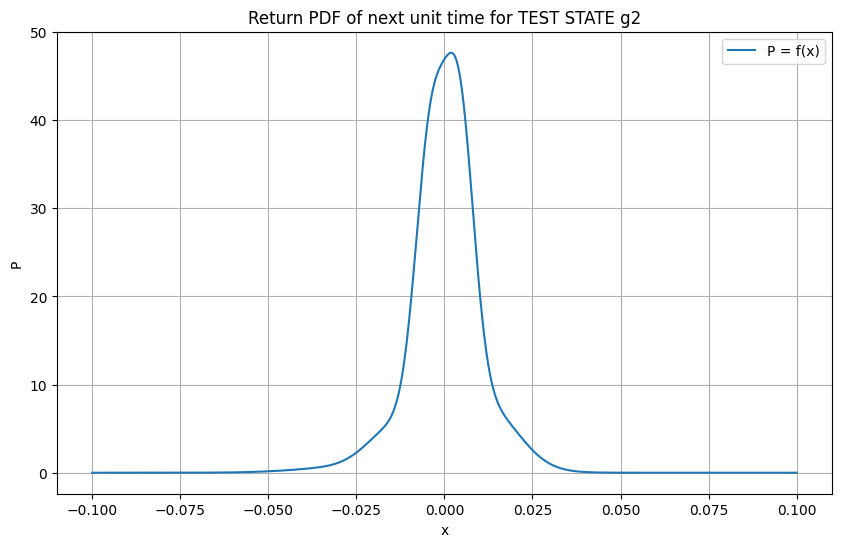

(0.5234518905052358, 1.4763059159529855e-08)

In [72]:
x = get_optimal_bet_next_unit(return_pdf)
print(x)

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(func, x_range=(-10, 10), num_points=1000, title="Function Plot", xlabel="x", ylabel="f(x)"):
    """
    Plots a given function over a specified range.

    Parameters:
    - func: The function to plot. It should take a single argument (x).
    - x_range: A tuple specifying the range of x values (min, max).
    - num_points: The number of points to plot.
    - title: The title of the plot.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    """
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = [func(ele) for ele in x]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'{ylabel} = f({xlabel})')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_function(return_pdf, x_range=(-0.1, 0.1), title=f"Return PDF of next unit time for TEST STATE {TEST_STATE}", xlabel="x", ylabel="P")
quad(return_pdf, 0, np.inf)

-8.881784197001252e-16

In [81]:
import mpmath

return_pdf = next_unit_time_return_pdf['g2']
multiplier = find_multiplier_modify_pdf(return_pdf, MIN, MAX)
f = lambda r: multiplier * return_pdf(r) if MIN <= r <= MAX else return_pdf(r)
# expectation = lambda r: r * f(r) if r <= 0 else 100 * r * f(r)
val1 = mpmath.quad(f, [-1, 0])
val2 = mpmath.quad(f, [0, 10])
total = val1 + val2
should_be_equal = mpmath.quad(f, [-1, 10])
total - should_be_equal

(0.47654810949476495, 0.5234518905052351, 1.0)

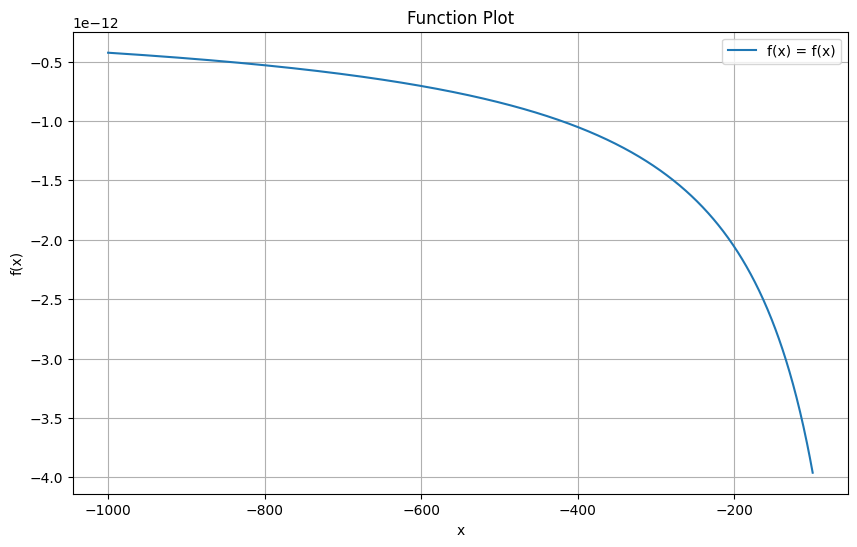

In [75]:
g = lambda S: integral_function_abstract(S, f)
plot_function(g, x_range=(-1000, -100))

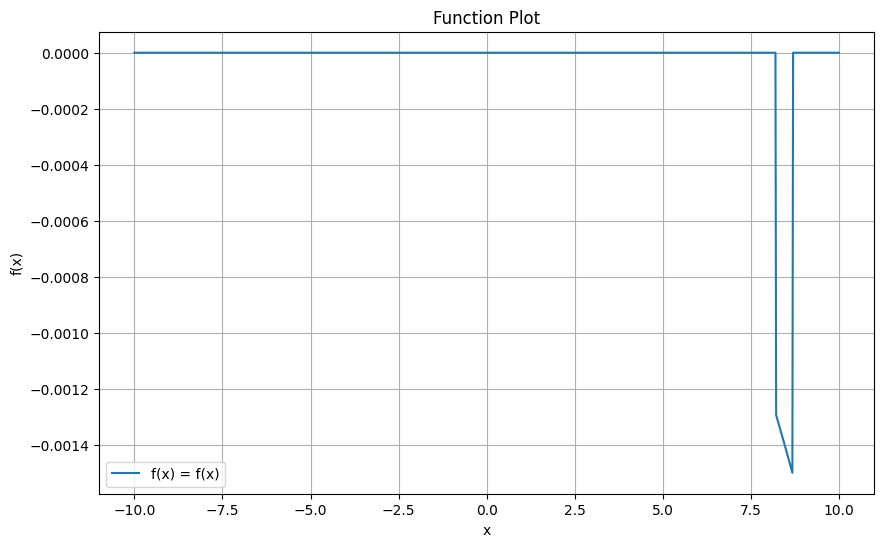

In [76]:
f = lambda S: integral_function_abstract(S, next_unit_time_return_pdf['d4'])
plot_function(f, x_range=(-10, 10))

In [77]:
f(8)

-4.26046490683114e-09

In [78]:
quad(return_pdf, 0, np.inf)
f = lambda S: integral_function_abstract(S, next_unit_time_return_pdf['d3'])
plot_function(f, x_range=(-10, 10), y_range)

SyntaxError: positional argument follows keyword argument (3859529092.py, line 3)

In [ ]:
f = lambda x: integral_function_abstract(x, example_return_pdf)
plot_function(f, x_range=(0, 1))

In [ ]:
# Testing with S = 1 for debugging
"""
Original:

def integral_function_abstract(S, return_pdf, maximum_return=10):

Computes the integral of p(x) * x / (1 + S * x) over the range [minimum_return, maximum_return].

Parameters:
- S: The Kelly bet fraction.
- return_pdf: The probability density function of returns.
- maximum_return: The upper limit for integration.

Returns:
- result: The value of the integral.

# if not 0 <= S <= 1:
    # return 0
minimum_return = -1  # Adjust as necessary for your distribution

def integrand(x):
    return return_pdf(x) * x / (1 + S * x)

result, error = quad(integrand, minimum_return, maximum_return)

return result
"""


def testing_integrand(return_pdf):
    def return_adj_pdf(x):
        return return_pdf(x) * x / (1 + 0.8 * x)
    return return_adj_pdf

quad(testing_integrand(return_pdf), -1, np.inf)

In [ ]:
from Markov_Strategies.Markov_Strategy import MarkovStrategy
"""
TODO: Generate a strategy for each fitted return distribution with the Kelly Optimal Bet.
Run it through backtester, wallah!!

Assumes:
Have a dictionary of states & the next bet corresponding
"""
# Modify later.
kelly_dict = None
buying_states = []
wagers = []
for state in possible_states:
    if kelly_dict[state] is not None:
        buying_states.append(state)
        wagers.append(kelly_dict[state])
strategy = MarkovStrategy(buying_states, wagers)

In [ ]:
# Backtest above strategy
from Backtester.Markov_Backtester import MarkovBacktester
backtester = MarkovBacktester(data, strategy)
report = backtester.backtest_on_strategy(None)

In [ ]:
ticker = 'SPY'
scraper = YFScraper()
vol_state_col = 'state_v'
data = retrieve_data_and_add_features('SPY', scraper, start='2010-01-01', end='2019-01-01')
czech_state_determiner_price = CzechStateDeterminer(k=1, l=20)
transition_probability_calculator_price = EmpiricalCalculator(czech_state_determiner_price.possible_states)
data, transition_probability_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_price, transition_probability_calculator_price)

d = get_max_1d_return(data, transition_probability_matrix, czech_state_determiner_price, macro_units=9)
d['ret']

In [ ]:
d['avg_ret']

In [ ]:
d[]

In [ ]:
data = retrieve_data_and_add_features('SPY', scraper, start='2010-01-01', end='2019-01-01')
data = add_basic_technical_analysis_vars(data, col_to_ma='Adj Close', k=15)
czech_state_determiner_price = CzechStateDeterminer(k=1, l=20)
transition_probability_calculator_price = EmpiricalCalculator(czech_state_determiner_price.possible_states)
data, transition_probability_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_price, transition_probability_calculator_price)
get_max_1d_return(data, transition_probability_matrix, czech_state_determiner_price)

In [ ]:
data.head(30)

In [ ]:
import numpy as np
print(np.mean(data['RSI_15']))
np.std(data['RSI_15'])

In [ ]:
czech_state_determiner_volume = CzechStateDeterminer(k=1, l=20, col_to_std='volume_change', state_col=vol_state_col)
czech_state_determiner_price = CzechStateDeterminer(k=1, l=20)
# Look into condensing the trans prob matrices into a list.
transition_probability_calculator_price = EmpiricalCalculator(czech_state_determiner_price.possible_states)
transition_probability_calculator_volume = EmpiricalCalculator(czech_state_determiner_volume.possible_states, state_col=vol_state_col)
data = retrieve_data_and_add_features(ticker, scraper, start='2010-01-01', end='2024-01-01')
data, price_transition_prob_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_price, transition_probability_calculator_price)
data, volume_transition_prob_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_volume, transition_probability_calculator_volume)

In [4]:
price_transition_prob_matrix['d2']

g4    0.000000
g3    0.031161
g2    0.184136
d4    0.002833
g1    0.325779
d3    0.050992
d2    0.130312
d1    0.274788
Name: d2, dtype: float64

In [4]:
from Markov_Strategy_Determiner.GeometricMeanProbabilityOptimizer import GeometricMeanProbabilityOptimizer
col_to_optimize = 'daily_return'
threshold = 1
optimizer = GeometricMeanProbabilityOptimizer(data, price_transition_prob_matrix,
                                  czech_state_determiner_price.possible_states, czech_state_determiner_price.possible_states, col_to_optimize, threshold, state_before_col='state', state_after_col='state')
optimizer.determine_optimal_strategy()

1.0001986085760886
0.999079787742944
1.0006896322865506
0.9996369457490238
1.0025407118947833
1.0014130897898157
1.0019949603689053
1.0006374294959852


['d2', 'g1', 'd3', 'g4', 'd4', 'd1']